In [28]:
import tensorflow as tf
from tensorflow import keras
import re
import pandas as pd
import numpy as np
import string
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers,callbacks
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from keras.models import Sequential
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
import seaborn as sns
from livelossplot import PlotLossesKeras
from collections import defaultdict,Counter
from matplotlib import pyplot as plt

In [30]:
from ipynb.fs.full.Functions import evaluate_model

In [2]:
%store -r

In [3]:
df

,title,rate
0,"[ex, wife, threaten, suiciderecently, leave, w...",1.0
1,"[weird, get, affect, compliment, come, someone...",0.0
2,"[finally, 2020, almost, never, hear, 2020, bad...",0.0
3,"[need, helpjust, help, cry, hard]",1.0
4,"[ia, x80, x99m, losthello, name, adam, 16, ia,...",1.0
...,...,...
232042,"[like, rock, go, get, anything, go, https, //m...",0.0
232043,"[tell, many, friend, lonely, everything, depri...",0.0
232044,"[pee, probably, taste, like, salty, tead, x9f,...",0.0
232045,"[usual, stuff, find, herei, m, post, sympathy,...",1.0


In [4]:
def counter_word(text_co):
    count=Counter()
    for text in text_co.values:
        for word in text:
            count[word]+=1
    return count
counter=counter_word(df.title)

In [5]:
len(counter)

186243

In [6]:
num_unique_words=len(counter)

In [7]:
train_size= int(df.shape[0]*0.8)
train_df=df[:train_size]
val_df=df[train_size:]

train_sentences=train_df.title.to_numpy()
train_lables=train_df.rate.to_numpy()
val_sentences=val_df.title.to_numpy()
val_lables=val_df.rate.to_numpy()

In [8]:
train_sentences.shape

(185512,)

In [9]:
tokenizer=Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(train_sentences)

In [10]:
word_index=tokenizer.word_index

In [11]:
word_index

{'x80': 1,
 'want': 2,
 'get': 3,
 'go': 4,
 'like': 5,
 'know': 6,
 'feel': 7,
 'a': 8,
 'ia': 9,
 'life': 10,
 'x99t': 11,
 'would': 12,
 'think': 13,
 'make': 14,
 'time': 15,
 'people': 16,
 'one': 17,
 'x99m': 18,
 'even': 19,
 'year': 20,
 'really': 21,
 'fuck': 22,
 'say': 23,
 'day': 24,
 'friend': 25,
 'thing': 26,
 'try': 27,
 'x9f': 28,
 '?': 29,
 'help': 30,
 'never': 31,
 'tell': 32,
 'x99s': 33,
 'good': 34,
 'take': 35,
 'much': 36,
 'talk': 37,
 'live': 38,
 'see': 39,
 'could': 40,
 'bad': 41,
 'end': 42,
 'kill': 43,
 'die': 44,
 'dona': 45,
 'love': 46,
 'need': 47,
 'way': 48,
 'work': 49,
 'x8d': 50,
 'school': 51,
 'x8aa': 52,
 'someone': 53,
 'anything': 54,
 'well': 55,
 'anymore': 56,
 'back': 57,
 'start': 58,
 'still': 59,
 'd': 60,
 'give': 61,
 'something': 62,
 'everything': 63,
 'come': 64,
 'find': 65,
 'family': 66,
 'filler': 67,
 'nothing': 68,
 'always': 69,
 'care': 70,
 'keep': 71,
 'every': 72,
 'anyone': 73,
 'right': 74,
 'leave': 75,
 'aps': 76

In [14]:
train_sequences=tokenizer.texts_to_sequences(train_sentences)
val_sequences=tokenizer.texts_to_sequences(val_sentences)

In [15]:
max_length=350

In [16]:
train_padded=pad_sequences(train_sequences,maxlen=max_length,padding='post',truncating='post')
val_padded=pad_sequences(val_sequences,maxlen=max_length,padding='post',truncating='post')

In [17]:
train_padded.shape

(185512, 350)

In [18]:
reverse_word_index=dict([(idx,word) for (word,idx) in word_index.items()])

In [19]:
reverse_word_index

{1: 'x80',
 2: 'want',
 3: 'get',
 4: 'go',
 5: 'like',
 6: 'know',
 7: 'feel',
 8: 'a',
 9: 'ia',
 10: 'life',
 11: 'x99t',
 12: 'would',
 13: 'think',
 14: 'make',
 15: 'time',
 16: 'people',
 17: 'one',
 18: 'x99m',
 19: 'even',
 20: 'year',
 21: 'really',
 22: 'fuck',
 23: 'say',
 24: 'day',
 25: 'friend',
 26: 'thing',
 27: 'try',
 28: 'x9f',
 29: '?',
 30: 'help',
 31: 'never',
 32: 'tell',
 33: 'x99s',
 34: 'good',
 35: 'take',
 36: 'much',
 37: 'talk',
 38: 'live',
 39: 'see',
 40: 'could',
 41: 'bad',
 42: 'end',
 43: 'kill',
 44: 'die',
 45: 'dona',
 46: 'love',
 47: 'need',
 48: 'way',
 49: 'work',
 50: 'x8d',
 51: 'school',
 52: 'x8aa',
 53: 'someone',
 54: 'anything',
 55: 'well',
 56: 'anymore',
 57: 'back',
 58: 'start',
 59: 'still',
 60: 'd',
 61: 'give',
 62: 'something',
 63: 'everything',
 64: 'come',
 65: 'find',
 66: 'family',
 67: 'filler',
 68: 'nothing',
 69: 'always',
 70: 'care',
 71: 'keep',
 72: 'every',
 73: 'anyone',
 74: 'right',
 75: 'leave',
 76: 'aps'

In [20]:
def decode(sequence):
    return " ".join([reverse_word_index.get(idx,"?") for idx in sequence])

In [21]:
decode_text=decode(train_sequences[1])

print(train_sequences[1])
print(decode_text)

[374, 3, 914, 1806, 64, 53, 6, 1416, 7, 21, 34, 624, 916]
weird get affect compliment come someone know irl feel really good internet stranger


In [22]:
model=Sequential()
model.add(layers.Embedding(num_unique_words,32,input_length=max_length))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(layers.LSTM(64,dropout=0.1))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

2022-05-30 13:37:55.172106: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-30 13:37:55.172345: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 350, 32)           5959776   
                                                                 
 conv1d (Conv1D)             (None, 350, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 175, 32)          0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 5,987,777
Trainable params: 5,987,777
Non-trainable params: 0
________________

In [23]:
loss=keras.losses.BinaryCrossentropy(from_logits=False)
optim=keras.optimizers.Adam(lr=0.001)
metrics=["accuracy"]

model.compile(loss=loss,optimizer=optim,metrics=metrics)

/Users/debritbhattacharyya/tensorflow-test/env/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
history=model.fit(train_padded,train_lables,epochs=10,validation_data=(val_padded,val_lables),callbacks=EarlyStopping(monitor='val_loss'),verbose=1)

Epoch 1/10


2022-05-30 13:38:01.931815: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-30 13:38:02.932416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 13:38:03.110265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 13:38:03.380224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5798/5798 [==============================] - ETA: 0s - loss: 0.2736 - accuracy: 0.8743

2022-05-30 13:47:52.244888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 13:47:52.309295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


5798/5798 [==============================] - 618s 106ms/step - loss: 0.2736 - accuracy: 0.8743 - val_loss: 0.1598 - val_accuracy: 0.9400
Epoch 2/10
5798/5798 [==============================] - 618s 107ms/step - loss: 0.1326 - accuracy: 0.9519 - val_loss: 0.1415 - val_accuracy: 0.9458


In [25]:
predictions= model.predict(val_padded)
predictions=[1 if p>0.5 else 0 for p in predictions]

2022-05-30 14:15:12.409667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-30 14:15:12.513547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


              precision    recall  f1-score   support

         0.0     0.9437    0.9482    0.9459     23179
         1.0     0.9480    0.9435    0.9457     23199

    accuracy                         0.9458     46378
   macro avg     0.9458    0.9458    0.9458     46378
weighted avg     0.9458    0.9458    0.9458     46378



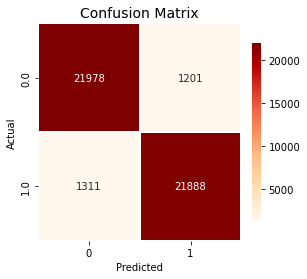

In [31]:
evaluate_model(20,y_true = val_lables, 
               y_pred =predictions, 
               report=True,
              plot=True)